# Warp perspective transforms the perspective for the front view camera to the eagle view. 
A mapping to the 1m2 grid from front and above is used.
Perspective transforms involve some complicated geometry but here we use the OpenCV functions 'cv2.getPerspectiveTransform()' and 'cv2.warpPerspective()' to do the heavy lifting.

the following steps are required:

* Define 4 source points, in this case, the 4 corners of a grid cell
* Define 4 destination points (must be listed in the same order as source points!)
* Use cv2.getPerspectiveTransform() to get M, the transform matrix
* Use cv2.warpPerspective() to apply M and warp your image to a top-down view

## Defining the 4 source points
To perform the first step of selecting source

### Loading the calibration image

<IPython.core.display.Javascript object>


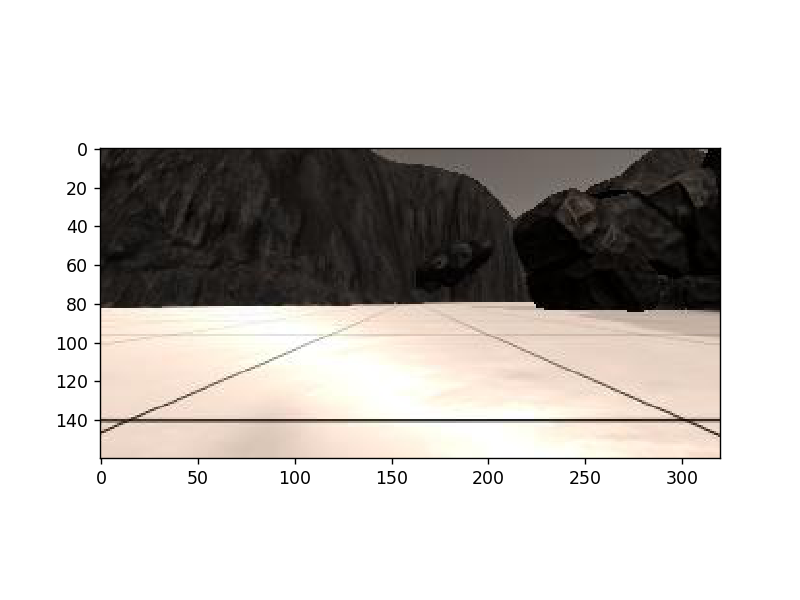

In [8]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
# This enables the interactive matplotlib window
%matplotlib notebook
image = mpimg.imread('example_grid1.jpg')
plt.imshow(image)
plt.show()

Clockwise start bottom left

Point 1:
x = 14.5581
y = 139.648
[23, 5, 0]

Point 2:
x = 119.074
y = 95.7774
[167, 168, 159]

Point 3:
x = 119.719
y = 95.7774
[169, 147, 133]

Point 4:
x = 301.655
y = 139.648
[26, 8, 0]

## Defining the destination Points
In this case, it makes sense to choose a square set of points so that square meters in the grid are represented by square areas in the destination image. Mapping a one-square-meter grid cell in the image to a square that is 10x10 pixels, for example, implies a mapping of each pixel in the destination image to a 0.1x0.1 meter square on the ground.

this would be from bottom left:

Point 1:
x = 0
y = 0

Point 2:
x = 0
y = 10

Point 3:
x = 10
y = 10

Point 4:
x = 10
y = 0

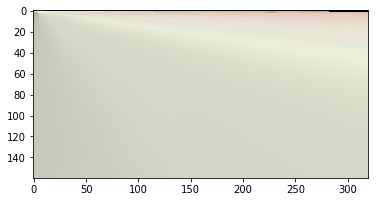

In [7]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
# This enables the display of the image in jupyter view
%matplotlib inline
image2 = mpimg.imread('example_grid1.jpg')

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(image2, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# Define source and destination points

source = np.float32([[14.5581, 139.648], [119, 95.7774], [119.719, 95.774], [301.655, 139.648]])
destination = np.float32([[0, 0 ], [0, 10], [10, 10 ], [10, 0]])

warped = perspect_transform(image, source, destination)
plt.imshow(warped)
plt.show()


As the grid is in front of the rover and not actually bellow it and the camera is above ground an adjustment is required. This has been applied in the bellow final code.

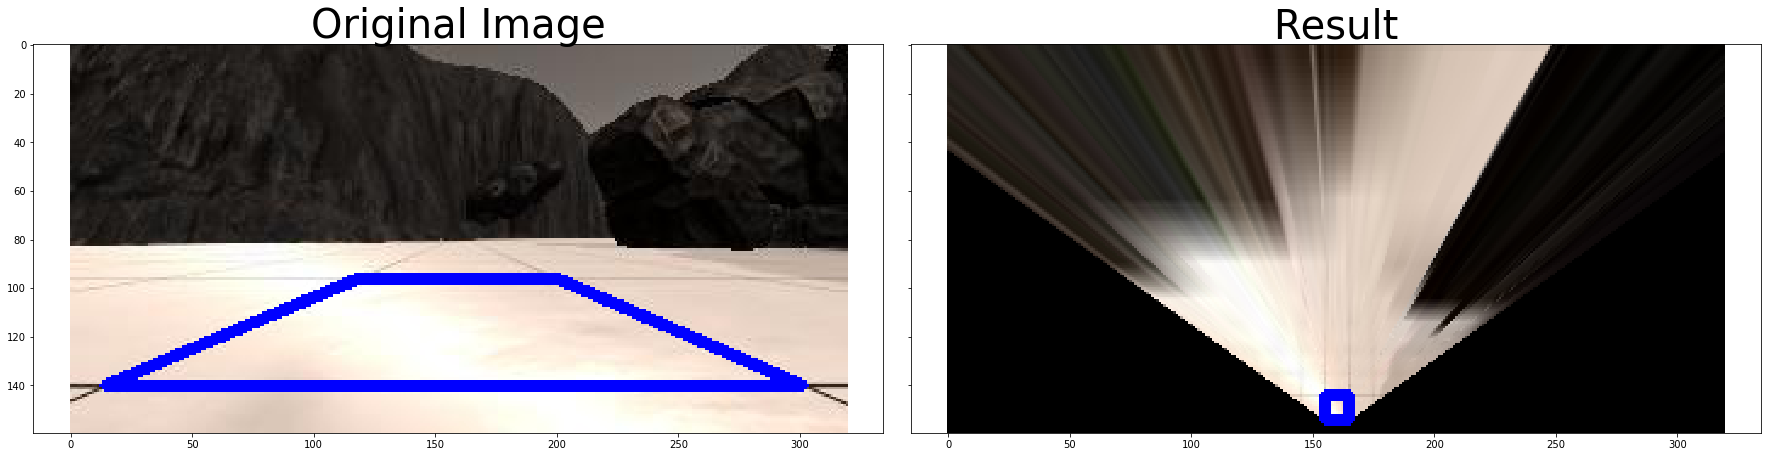

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
#next line is only for jupyter
%matplotlib inline
image = mpimg.imread('example_grid1.jpg')

def perspect_transform(img, src, dst):

    # Get transform matrix using cv2.getPerspectivTransform()
    M = cv2.getPerspectiveTransform(src, dst)
    # Warp image using cv2.warpPerspective()
    # keep same size as input image
    warped = cv2.warpPerspective(img, M, (img.shape[1], img.shape[0]))
    # Return the result
    return warped

# TODO:
# Define a box in source (original) and 
# destination (desired) coordinates
# Right now source and destination are just 
# set to equal the four corners
# of the image so no transform is taking place
# Try experimenting with different values!
dst_size = 5 
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6
source = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
destination = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

warped = perspect_transform(image, source, destination)
# Draw Source and destination points on images (in blue) before plotting
cv2.polylines(image, np.int32([source]), True, (0, 0, 255), 3)
cv2.polylines(warped, np.int32([destination]), True, (0, 0, 255), 3)
# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)